In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

training = pd.read_csv('D:/Program Files/machine learning/Kaggle Real Projects/house price prediction/train.csv')
training

In [3]:
training['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

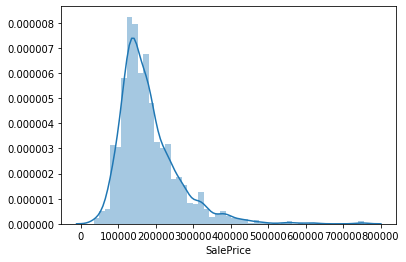

In [4]:
sns.distplot(training['SalePrice'])

In [6]:
print('Skewness:%f'%training['SalePrice'].skew())
print('Kurtosis:%f'%training['SalePrice'].kurt())

Skewness:1.882876
Kurtosis:6.536282


(-0.5, 1.5, 0, 800000)

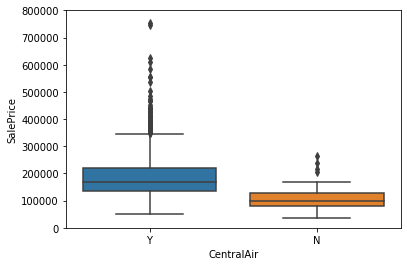

In [10]:
var = 'CentralAir'
data = pd.concat([training['SalePrice'], training[var]], axis = 1)
fig = sns.boxplot(x = var, y = 'SalePrice', data = data)
fig.axis(ymin = 0, ymax = 800000)

(-0.5, 9.5, 0, 800000)

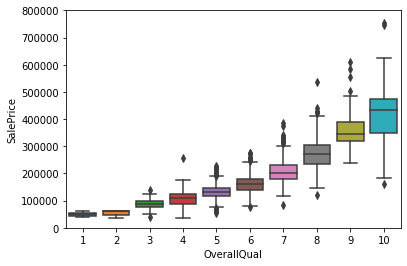

In [11]:
var = 'OverallQual'
data = pd.concat([training['SalePrice'], training[var]], axis = 1)
fig = sns.boxplot(x = var, y = 'SalePrice', data = data)
fig.axis(ymin = 0, ymax = 800000)

(-0.5, 111.5, 0, 800000)

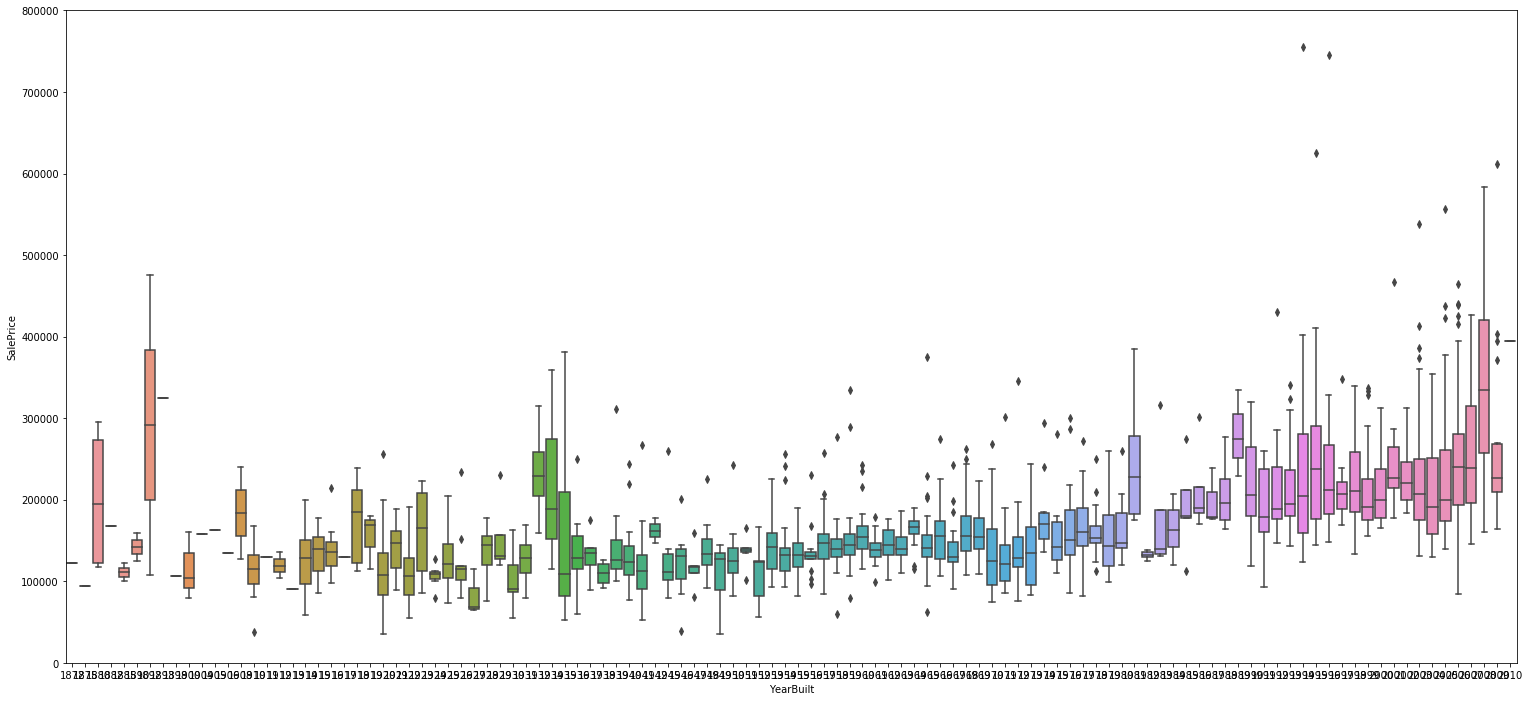

In [12]:
var = 'YearBuilt'
data = pd.concat([training['SalePrice'], training[var]], axis = 1)
fig, ax = plt.subplots(figsize = (26, 12))
fig = sns.boxplot(x = var, y = 'SalePrice', data = data)
fig.axis(ymin = 0, ymax = 800000)

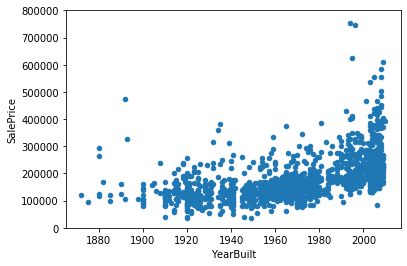

In [13]:
var = 'YearBuilt'
data = pd.concat([training['SalePrice'], training[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice', ylim = (0, 800000))

(-0.5, 24.5, 0, 800000)

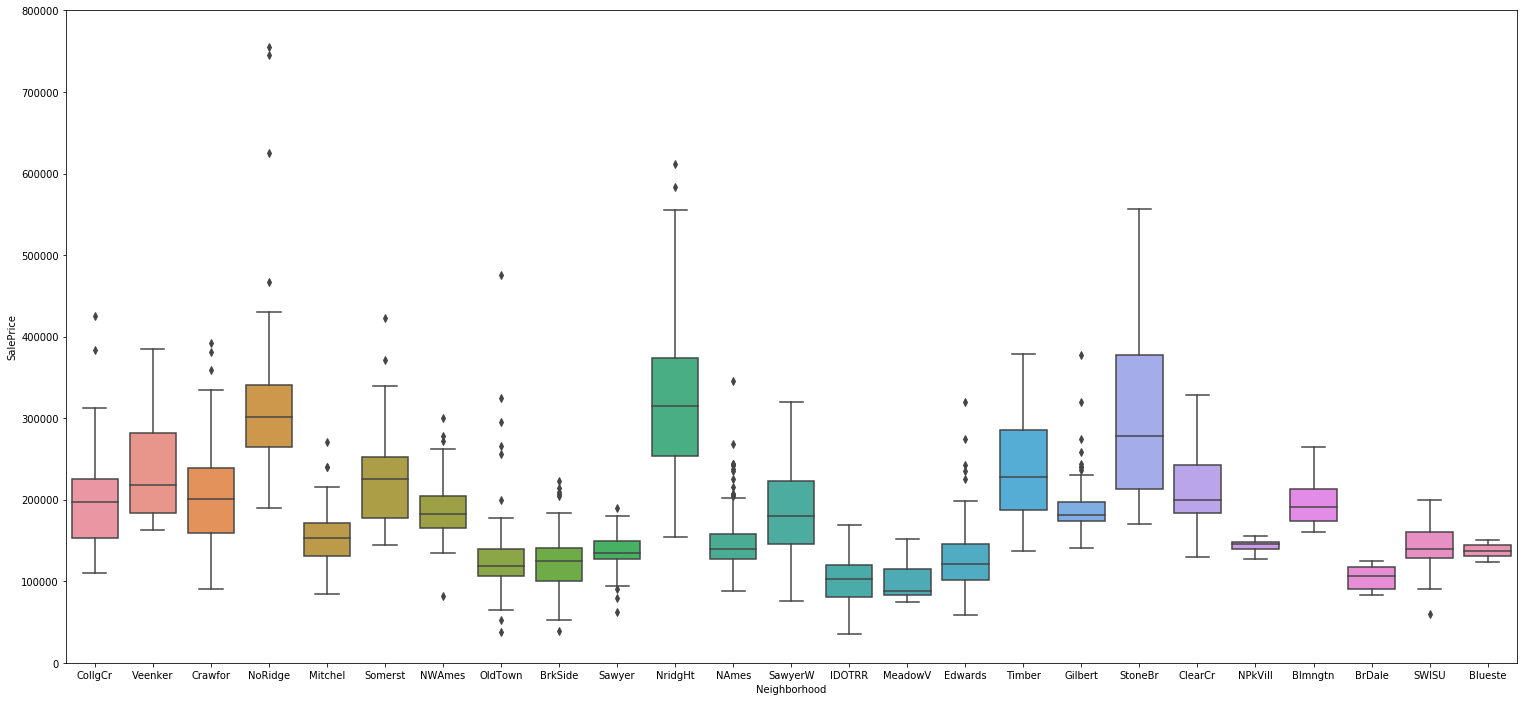

In [14]:
var = 'Neighborhood'
data = pd.concat([training['SalePrice'], training[var]], axis = 1)
fig, ax = plt.subplots(figsize = (26, 12))
fig = sns.boxplot(x = var, y = 'SalePrice', data = data)
fig.axis(ymin = 0, ymax = 800000)

In [22]:
location = []
for i in data['Neighborhood']:
    if i not in location:
        location.append(i)
Neighbor_data = data.sort_values(['Neighborhood', 'SalePrice'])

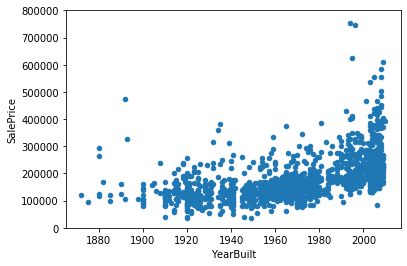

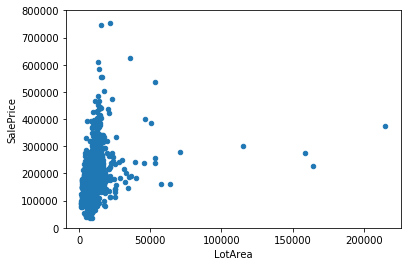

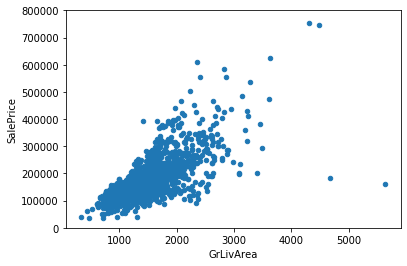

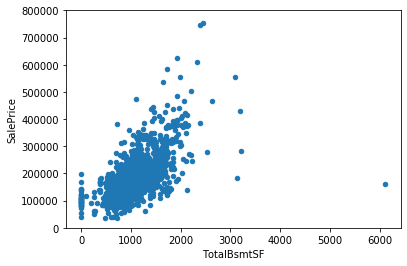

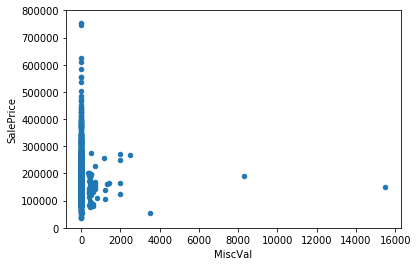

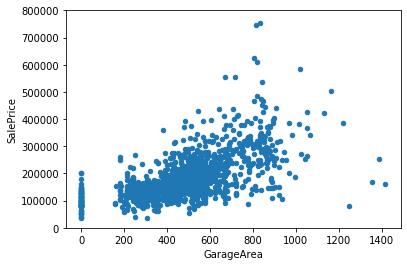

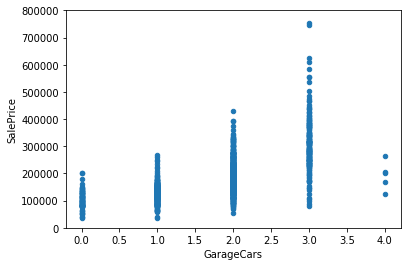

In [28]:
var = ['YearBuilt', 'LotArea', 'GrLivArea', 'TotalBsmtSF', 'MiscVal', 'GarageArea', 'GarageCars']
for i in range(len(var)):
    data = pd.concat([training['SalePrice'], training[var[i]]], axis = 1)
    data.plot.scatter(x = var[i], y = 'SalePrice', ylim = (0, 800000))

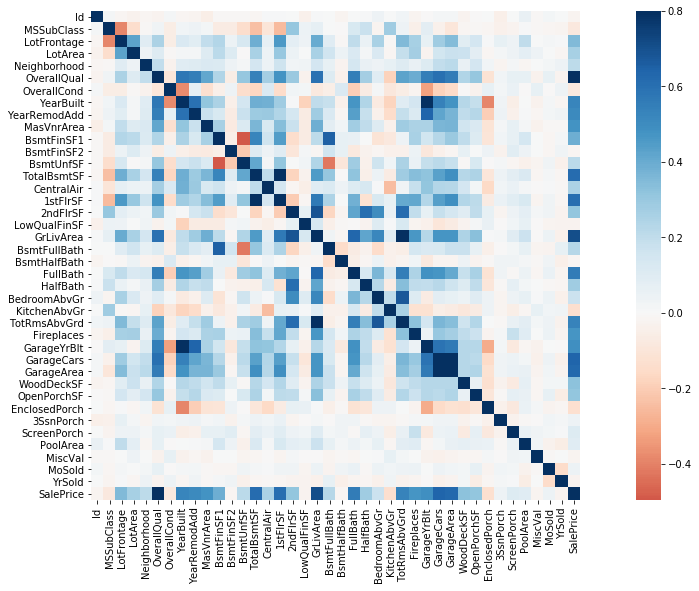

In [36]:
from sklearn import preprocessing

categorical_name = ['CentralAir', 'Neighborhood']
for i in categorical_name:
    label = preprocessing.LabelEncoder()
    training[i] = label.fit_transform(training[i])
corrmat = training.corr()
fig, ax = plt.subplots(figsize = (20, 9))
sns.heatmap(corrmat, cmap = 'RdBu', center = 0, vmax = 0.8, square = True)

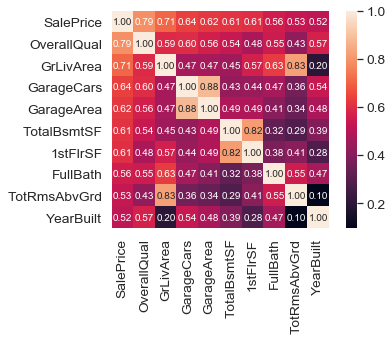

In [37]:
k = 10
feature_nums = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
selected_corrmat = np.corrcoef(training[feature_nums].values.T)
sns.set(font_scale = 1.25)
newheatmap = sns.heatmap(selected_corrmat, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10}, yticklabels = feature_nums.values, xticklabels = feature_nums.values)
plt.show()

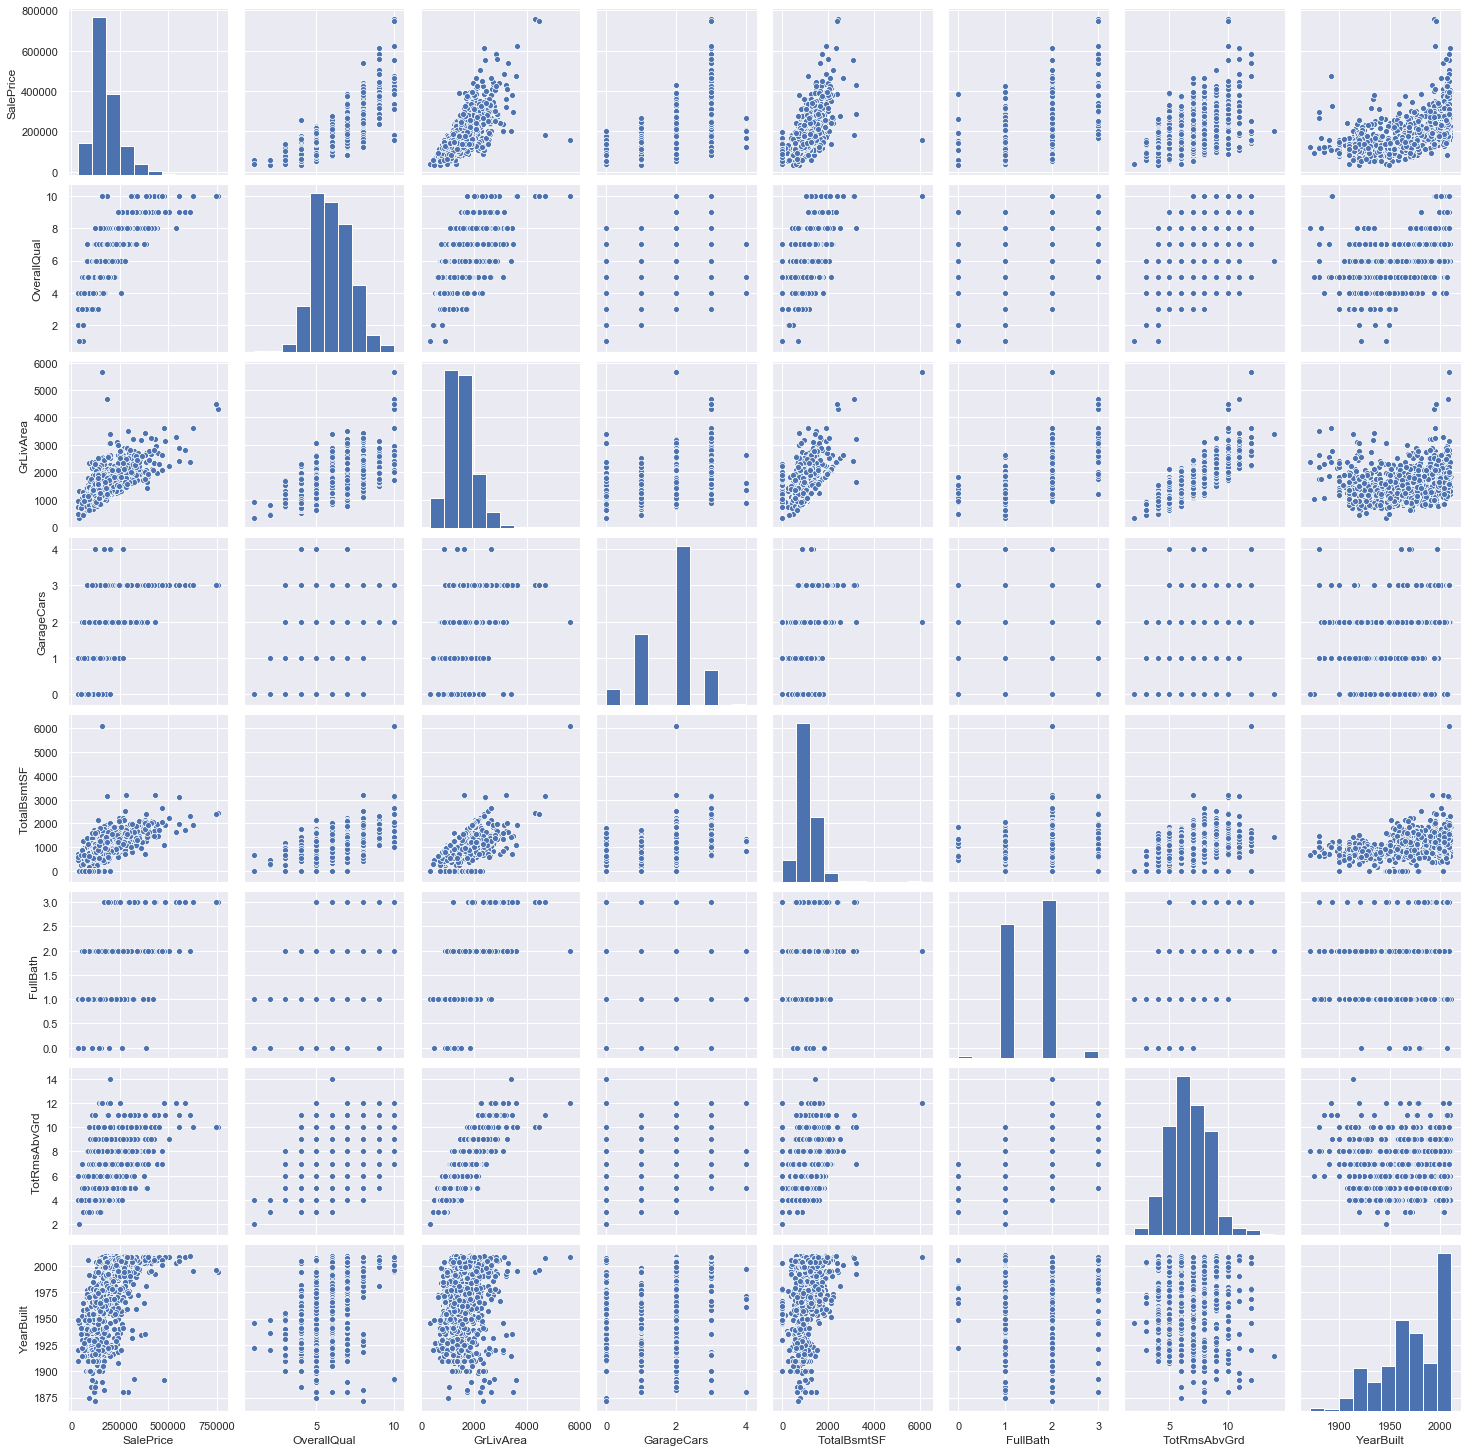

In [38]:
sns.set()
features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.pairplot(training[features], size = 2.5)
plt.show()

In [60]:
from sklearn import preprocessing
from sklearn import linear_model, svm, gaussian_process
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np

features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
Xtrain = training[features].values
Ytrain = training['SalePrice'].values
Xtrain_scaled = preprocessing.StandardScaler().fit_transform(Xtrain)
Ytrain_scaled = preprocessing.StandardScaler().fit_transform(Ytrain.reshape(-1, 1))
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xtrain_scaled, Ytrain_scaled, test_size = 0.33, random_state = 42)
Xtrain.shape

(978, 7)

In [68]:
models = {'svm': svm.SVR(), 
          'RandomForestRegressor': RandomForestRegressor(n_estimators = 400), 
          'BayesianRidge':linear_model.BayesianRidge()}

for model in models:
    try:
        models[model].fit(Xtrain, Ytrain)
        Ypred = models[model].predict(Xtest)
        print(model + ' cost:' + str(np.sum(Ypred - Ytest)/len(Ypred)))
    except Exception as e:
        print(model + 'Error:')
        print(str(e))
        

svm cost:-18.002439870767585
RandomForestRegressor cost:-0.827280055329175
BayesianRidge cost:-17.191504693239168


In [69]:
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
Xtrain = training[features].values
Ytrain = training['SalePrice'].values
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xtrain_scaled, Ytrain_scaled, test_size = 0.33, random_state = 42)
Xtrain.shape
model = RandomForestRegressor(n_estimators = 400)
model.fit(Xtrain, Ytrain)
Ypred = model.predict(Xtest)
np.sum(Ypred - Ytest)/len(Ypred)

-2.0336278054314576

In [82]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
testing = pd.read_csv('D:/Program Files/machine learning/Kaggle Real Projects/house price prediction/train.csv')
testing[features]

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt
0,7,1710,2,856,2,8,2003
1,6,1262,2,1262,2,6,1976
2,7,1786,2,920,2,6,2001
3,7,1717,3,756,1,7,1915
4,8,2198,3,1145,2,9,2000
...,...,...,...,...,...,...,...
1455,6,1647,2,953,2,7,1999
1456,6,2073,2,1542,2,7,1978
1457,7,2340,1,1152,2,9,1941
1458,5,1078,1,1078,1,5,1950


In [84]:
Xtest = testing[features].values
Ypred_test = model.predict(Xtest)
Ypred_test.shape

(1460,)

In [85]:
prediction = pd.DataFrame(Ypred_test, columns = ['SalePrice'])
final = pd.concat([testing['Id'], prediction], axis = 1)
final.columns

Index(['Id', 'SalePrice'], dtype='object')

In [86]:
final.to_csv('D:/Program Files/machine learning/Kaggle Real Projects/house price prediction/prediction.csv', index = False)